<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Si_bandstructure%26densityof_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 8.9 MB/s eta 0:00:00


In [12]:
import requests,zipfile,io,tempfile,os
from jarvis.io.vasp.outputs import Vasprun
from jarvis.db.figshare import get_jid_data
from jarvis.db.jsonutils import dumpjson, loadjson
from jarvis.core.kpoints import Kpoints3D
# We will download vasprun.xml from JARVIS-DFT elastic tensor calculations for Silicon (JVASP-1002)
jid = 'JVASP-1002'
x=get_jid_data(jid=jid,dataset='dft_3d')
for i in x['raw_files']:
  if 'OPT-Bandst' in i:
    print(i)
    tmp = i.split(".zip,")[1]
    r = requests.get(tmp)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    vrun_path = z.read("vasprun.xml").decode("utf-8")
    fd, path = tempfile.mkstemp()
    with os.fdopen(fd, "w") as tmp:
        tmp.write(vrun_path)
    vrun_bands = Vasprun(path)
    kp_path =  z.read("KPOINTS").decode("utf-8")
    kfd, kpath = tempfile.mkstemp()
    with os.fdopen(kfd, "w") as tmp:
        tmp.write(kpath)


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
OPT-Bandst,JVASP-1002.zip,https://ndownloader.figshare.com/files/23713301


gap= 0.6555999999999997


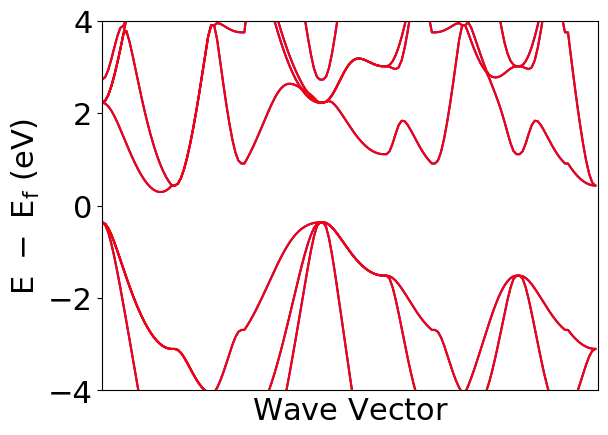

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
vrun_bands.get_bandstructure(kpoints_file_path=kpath,plot=True)
plt.show()

In [16]:
!wget https://github.com/usnistgov/jarvis/raw/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml -O vasprun.xml

--2023-07-30 05:21:37--  https://github.com/usnistgov/jarvis/raw/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/usnistgov/jarvis/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml [following]
--2023-07-30 05:21:38--  https://raw.githubusercontent.com/usnistgov/jarvis/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/vasprun.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5316672 (5.1M) [text/plain]
Saving to: ‘vasprun.xml’

vasprun.xml         100%[===================>]   5.07M

In [17]:
!wget https://github.com/usnistgov/jarvis/raw/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS -O KPOINTS

--2023-07-30 05:21:57--  https://github.com/usnistgov/jarvis/raw/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/usnistgov/jarvis/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS [following]
--2023-07-30 05:21:57--  https://raw.githubusercontent.com/usnistgov/jarvis/v2020.7.4/jarvis/examples/vasp/SiOptb88/MAIN-BAND-bulk%40mp_149/KPOINTS
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5450 (5.3K) [text/plain]
Saving to: ‘KPOINTS’

KPOINTS             100%[===================>]   5.32K  --.-KB/s    in 0s

In [18]:
!ls

KPOINTS  sample_data  vasprun.xml


In [19]:
from jarvis.io.vasp.outputs import Vasprun
vrun = Vasprun('vasprun.xml')

gap= 0.6555999999999997


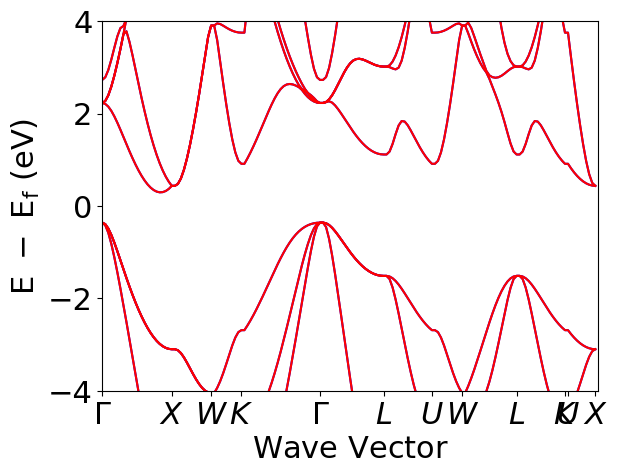

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
info = vrun.get_bandstructure(kpoints_file_path='KPOINTS',plot=True)

In [22]:
'direct bandgap=',vrun.get_dir_gap

('direct bandgap=', 2.589899999999999)

In [23]:
'indirect bandgap=',vrun.get_indir_gap

('indirect bandgap=', (0.6555999999999997, 5.5444, 6.2))

In [24]:
vrun.is_spin_orbit,vrun.is_spin_polarized

(False, True)

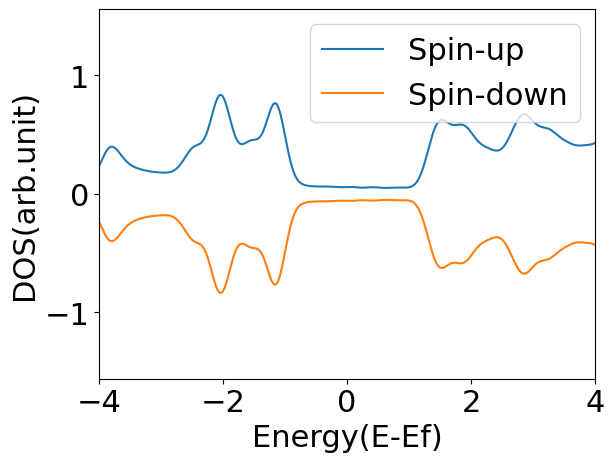

In [25]:
energies, spin_up, spin_dn=vrun.total_dos
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.plot(energies,spin_up,label='Spin-up')
plt.plot(energies,spin_dn,label='Spin-down')
plt.xlabel('Energy(E-Ef)')
plt.ylabel('DOS(arb.unit)')
plt.xlim(-4,4)
plt.legend()

In [27]:
info.keys()

dict_keys(['indir_gap', 'efermi', 'spin_up_bands_x', 'spin_up_bands_y', 'spin_down_bands_x', 'spin_down_bands_y', 'kp_labels_points', 'kp_labels'])

In [28]:
info['kp_labels_points']

[0, 23, 36, 46, 72, 93, 109, 119, 137, 153, 154, 163]

In [31]:
vrun.kpoints.kpts.shape

(164, 3)

In [44]:
vrun.nbands

24

In [67]:
spin=0
kp=0
(vrun.eigenvalues[spin][kp,:][:,0])

array([-6.1229,  5.5444,  5.5444,  5.5444,  8.1343,  8.1343,  8.1343,
        8.6336, 13.2595, 13.2595, 13.3599, 16.6714, 16.6714, 16.6714,
       20.7494, 28.2324, 28.2324, 28.2324, 29.3492, 29.3492, 30.554 ,
       30.554 , 30.554 , 34.2595])

In [74]:
kp=0
kx=[]
ky=[]
kz=[]
eigs=[]
for i,j in zip(vrun.kpoints.kpts,vrun.eigenvalues[0]):
  print (i,j[:,0])
  kp+=1
  kx.append(i[0])
  ky.append(i[1])
  kz.append(i[2])
  eigs.append(j[:,0][0])

[0. 0. 0.] [-6.1229  5.5444  5.5444  5.5444  8.1343  8.1343  8.1343  8.6336 13.2595
 13.2595 13.3599 16.6714 16.6714 16.6714 20.7494 28.2324 28.2324 28.2324
 29.3492 29.3492 30.554  30.554  30.554  34.2595]
[0.02173913 0.         0.02173913] [-6.1149  5.4864  5.5111  5.5111  8.1141  8.1775  8.1775  8.6906 13.1927
 13.2684 13.3961 16.6855 16.6855 16.7187 20.8081 28.0931 28.0931 28.2426
 29.2432 29.2564 30.6239 30.65   30.65   34.3219]
[0.04347826 0.         0.04347826] [-6.0908  5.3243  5.4175  5.4175  8.0554  8.3008  8.3008  8.8478 13.0088
 13.2953 13.5028 16.7279 16.7279 16.847  20.9823 27.7367 27.7367 28.2734
 28.9507 29.0238 30.7877 30.8765 30.8765 34.5055]
[0.06521739 0.         0.06521739] [-6.0507  5.0844  5.2783  5.2783  7.9632  8.4892  8.4892  9.0737 12.7473
 13.34   13.6749 16.7985 16.7985 17.0276 21.2664 27.2601 27.2601 28.3253
 28.526  28.7155 30.9815 31.1383 31.1383 34.8107]
[0.08695652 0.         0.08695652] [-5.9945  4.7924  5.1096  5.1096  7.8443  8.7267  8.7267  9.3307 

In [76]:
# from numpy import array
# from scipy.interpolate import RegularGridInterpolator as rgi
# my_interpolating_function = rgi((kx,ky,kz), eigs)